In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.1+cu121
True


In [11]:
emb=nn.Embedding(10, 20, padding_idx=0)
a=torch.tensor([[1,2,5,7,3],[2,3,0,0,0]])
b=emb(a)
print(b.shape)
print(b[1])

torch.Size([2, 5, 20])
tensor([[ 0.4822,  1.3621,  0.2252,  0.6814,  1.3971,  0.4757,  0.8171,  0.0214,
          1.2096, -2.4912, -0.6215,  0.6670,  1.4398,  0.7554, -0.3537,  0.2387,
          1.2184,  1.2937,  1.2457,  0.9291],
        [-0.3507,  1.2250, -0.6795,  0.4481,  0.2596, -1.1547, -1.9403, -0.0653,
          0.5509,  0.6937, -0.6084,  0.4220, -0.2091,  0.7310, -0.5541, -0.4813,
         -1.4689, -1.0132,  0.3557, -1.6086],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  

In [12]:
emb=nn.Embedding(10, 20, padding_idx=1)
a=torch.tensor([[1,2,5,7,3],[2,3,0,0,0]])
b=emb(a)
print(b.shape)
print(b[0])

torch.Size([2, 5, 20])
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.7377, -0.3635, -1.2353, -0.1608,  1.1684, -2.2062,  0.7354,  0.7748,
         -0.4566,  0.5528,  0.7504,  1.0069, -1.2950,  0.2140, -0.4545, -0.9956,
          0.1265,  0.2323,  0.4459,  1.5171],
        [ 0.7171, -1.0300,  0.1107, -0.0322, -0.3996,  0.8522, -0.2383,  0.2864,
          1.5473, -1.0004,  0.2634, -1.4470, -1.2397,  0.2397,  1.8389,  0.1151,
         -1.3386,  1.1363, -0.7215,  0.7458],
        [-1.3099, -0.7828, -0.3051,  0.9400,  0.6497,  1.0001, -0.6236,  0.5245,
          1.0046, -1.2444,  1.9854, -1.5617,  0.6607,  0.6414,  2.1636,  0.1884,
          2.8204,  0.6290,  0.6526,  0.5814],
        [ 2.7157,  0.9993, -0.1029,  0.4456, -0.3250, -2.0625, -1.0164,  1.5632,
         -0.4022,  0.6402, -0.7077,  0.0076, -1.1143,  1.0650, -

In [12]:
d_model=200
max_len=10

pos_code=torch.zeros(max_len,d_model)
pos=torch.tensor(np.arange(max_len)).unsqueeze(1)
_2i=torch.tensor(np.arange(d_model,step=2))
print(pos.shape)
print(_2i.shape)
pos_code[:,::2]=torch.sin(pos/(10000**(_2i/d_model)))
pos_code[:,1::2]=torch.cos(pos/(10000**(_2i/d_model)))

torch.Size([10, 1])
torch.Size([100])


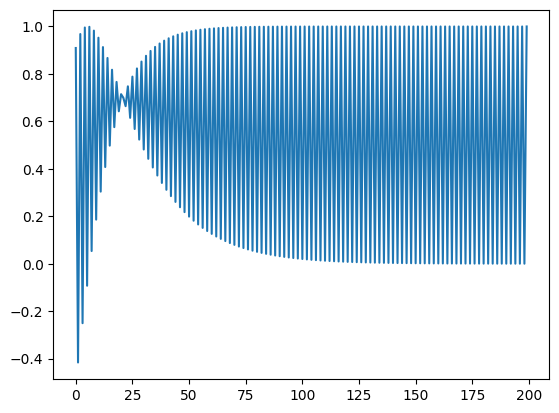

In [14]:
plt.figure()
for i in range(2,3):
    plt.plot(pos_code[i].tolist())
plt.show()

In [15]:
a=torch.zeros(2,5,5)
b=torch.ones(5,5)
a+b

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [17]:
score=torch.tensor([[1,2],[3,4]])
mask=torch.tensor([[1,1],[0,0]])
score.masked_fill(mask==0, -10000)

tensor([[     1,      2],
        [-10000, -10000]])

In [16]:
a=torch.tensor([[2,3,0]])
pad=0
mask=(a!=pad).to(torch.int).unsqueeze(1)
print(mask)
# mask=mask.transpose(1,2)@mask
print(mask)
score=torch.tensor([[1,2,2],[3,4,2],[1,1,1]])
score.masked_fill(mask==0, -10000)

tensor([[[1, 1, 0]]], dtype=torch.int32)
tensor([[[1, 1, 0]]], dtype=torch.int32)


tensor([[[     1,      2, -10000],
         [     3,      4, -10000],
         [     1,      1, -10000]]])

In [20]:
trg=torch.tensor([[2,3,0]])
trg_pad_idx=0
trg_pad_mask = (trg != trg_pad_idx).unsqueeze(1).unsqueeze(3)
print(trg_pad_mask)
trg_len = trg.shape[1]
trg_sub_mask = torch.tril(torch.ones(trg_len, trg_len)).type(torch.ByteTensor)
print(trg_sub_mask)
trg_mask = trg_pad_mask & trg_sub_mask
print(trg_mask)

tensor([[[[ True],
          [ True],
          [False]]]])
tensor([[1, 0, 0],
        [1, 1, 0],
        [1, 1, 1]], dtype=torch.uint8)
tensor([[[[1, 0, 0],
          [1, 1, 0],
          [0, 0, 0]]]], dtype=torch.uint8)


In [41]:
tgt=torch.tensor([[2,3,0]],device="cuda")

bs,tgt_len=tgt.size()
time_mask=torch.tril(torch.ones(tgt_len, tgt_len)).to(torch.float32).to(tgt.device)
print(time_mask)
self_mask=(tgt!=0).to(torch.float32).unsqueeze(1)
self_mask=self_mask.transpose(1,2)@self_mask
print(self_mask)
mask=time_mask*self_mask
print(mask)

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]], device='cuda:0')
tensor([[[1., 1., 0.],
         [1., 1., 0.],
         [0., 0., 0.]]], device='cuda:0')
tensor([[[1., 0., 0.],
         [1., 1., 0.],
         [0., 0., 0.]]], device='cuda:0')
